### Standards Vector Machine

#### Exercise 1 (p.368, Chap.9)

In [11]:
library(dplyr)
library(ggplot2)

###### a) 

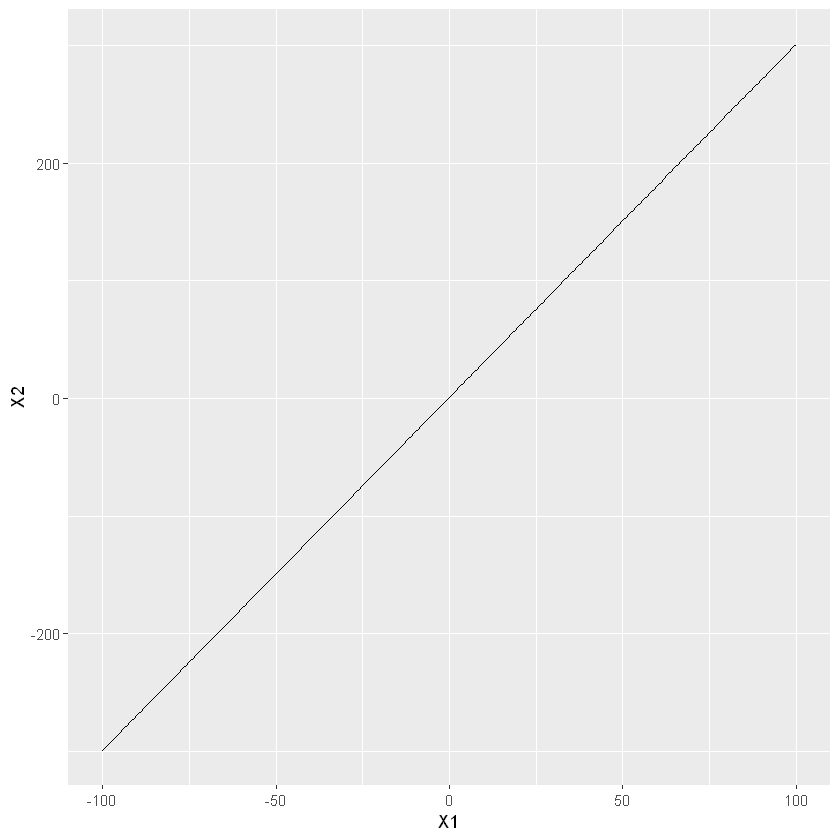

In [12]:
#Sketch the hyperlane 1 + 3X1 - X2 = 0


tibble(X1 = seq(-100, 100, 1), X2 = 3*X1 + 1) %>%
                    ggplot(aes(X1, X2)) + 
                    geom_line()



###### b) 

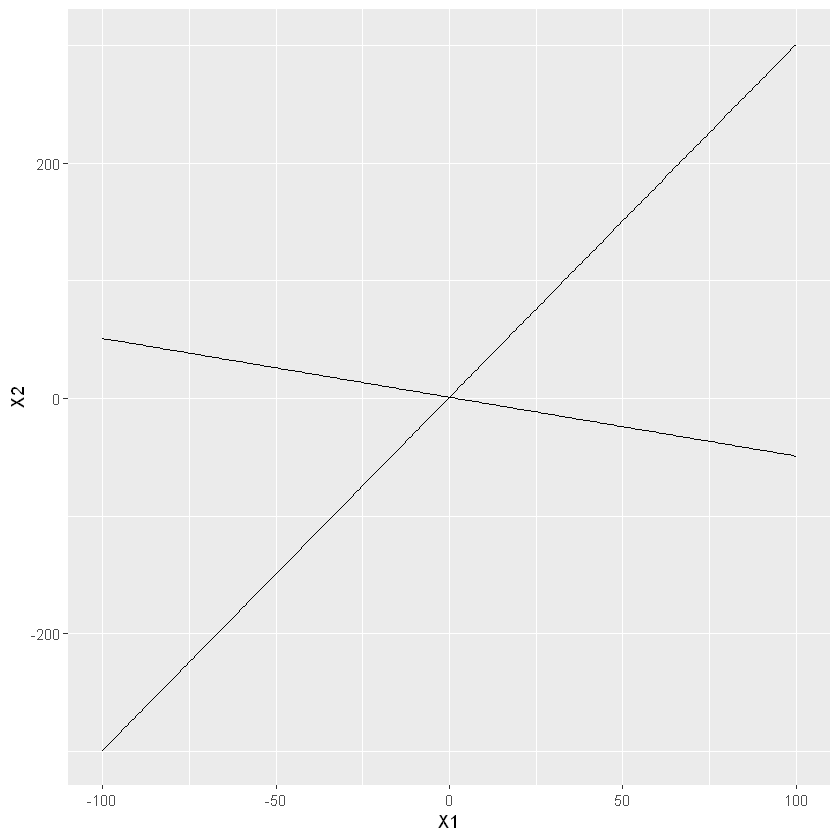

In [13]:
#sketch the hyper plane -2 + X1 + 2X2###### a) 
tibble(X1 = seq(-100, 100, 1), X2 = 3*X1 + 1, X3 = (2 - X1)/2) %>%
                    ggplot() +
                    geom_line(aes(X1,X2)) + 
                    geom_line(aes(X1,X3))

#### Exercise 2 (p.368, Chap.9)

###### a) 

In [14]:
#Sketch the curve (1 + X1)^2 + (2-X2)^2 = 4

#first import library(ggforce) to have the geom_circle option
install.packages("ggforce")
library(ggforce)

Warning message:
"package 'ggforce' is in use and will not be installed"


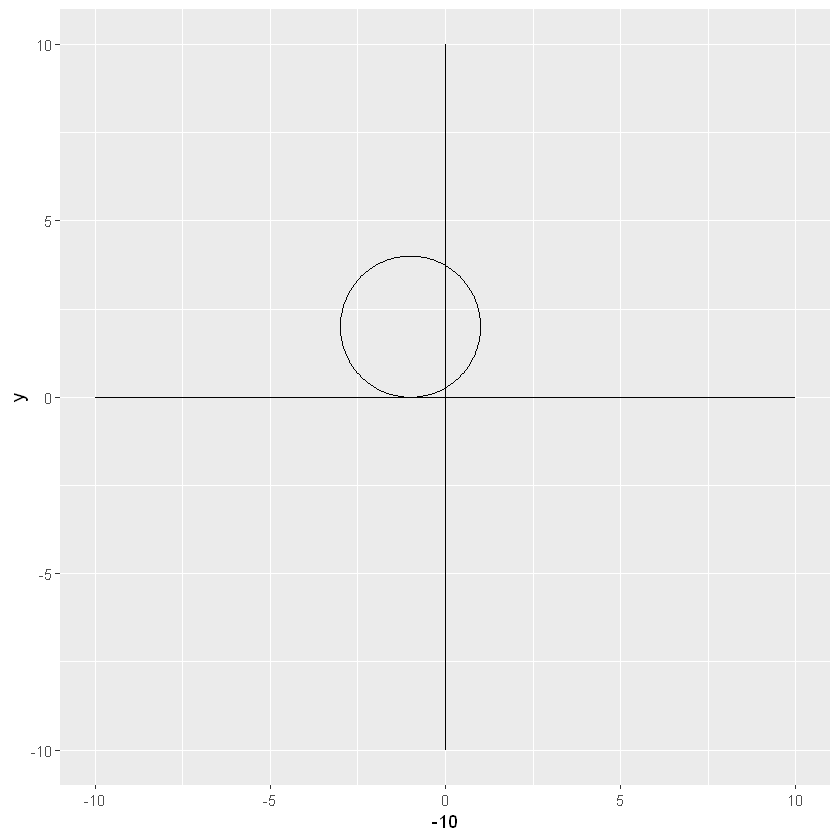

In [15]:
#here we have the equation of a circle with radius square 4, so radius 2, with a center at (-1,2)
ggplot() + 
    geom_circle(aes(x0 = -1, y0 = 2, r = 2)) + 
    geom_segment(aes(x = -10, y = 0, xend = 10, yend = 0)) +
    geom_segment(aes(x = 0, y = -10, xend = 0, yend = 10))


###### b) 

All the point inside or in the line of the circle are less than or equal to 4, and at the same time all point outside the cirlce are greater than 4.

###### c) 

We can see with our own eyes which point are inside or outside the circle 

In [16]:
(0,0) -> blue class
(-1,1) -> red class
(2,2) -> blue class
(3,8) -> blue class

ERROR: Error in parse(text = x, srcfile = src): <text>:1:3: unexpected ','
1: (0,
      ^


#### Exercise 4 (p.369, Chap.9)

In [ ]:
set.seed(1)
x = matrix(rnorm(100*2), ncol = 2)
y = c(rep(-1,10), rep(1,10))
x[y==1,] = x[y==1,] +1
plot(x, col = (3-y))

In [ ]:
dat = data.frame(x =x, y = as.factor(y))
library(e1071)
svmfit = svm(y~., data =dat, kernel = "linear", cost = 10, scale = FALSE)
svmfit

In [10]:
plot(svmfit, dat)

ERROR: Error in plot(svmfit, dat): object 'svmfit' not found


#### Exercise 7 (p.371, Chap.9)

In [1]:
library(ISLR)
library(dplyr)
Auto$var = NULL
head(Auto)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,18,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
2,15,8,350,165,3693,11.5,70,1,buick skylark 320
3,18,8,318,150,3436,11.0,70,1,plymouth satellite
4,16,8,304,150,3433,12.0,70,1,amc rebel sst
5,17,8,302,140,3449,10.5,70,1,ford torino
6,15,8,429,198,4341,10.0,70,1,ford galaxie 500


In [2]:
variable = ifelse(Auto$mpg > median(Auto$mpg), 1, 0)

Auto$mpg_level = as.factor(variable)

summary(Auto$mpg_level)

0   1 
196 196

###### b)

In [18]:
library(e1071)
set.seed(1)

tune.out = tune(svm, mpg_level~., data = Auto, kernel = 'linear', ranges = list(cost = c(0.01,0.1,1,5,10,100)))
summary(tune.out)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost
    1

- best performance: 0.01025641 

- Detailed performance results:
   cost      error dispersion
1 1e-02 0.07653846 0.03617137
2 1e-01 0.04596154 0.03378238
3 1e+00 0.01025641 0.01792836
4 5e+00 0.02051282 0.02648194
5 1e+01 0.02051282 0.02648194
6 1e+02 0.03076923 0.03151981


Best parameter for cost is 1

###### c)

In [19]:
set.seed(1)
tune.out2 <- tune(svm, mpg_level ~., data = Auto, kernel = "polynomial", ranges = list(c(0.01,0.1,1,5,10,100)), degree = c(2,3,4,5))
summary(tune.out2)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 Var1
 0.01

- best performance: 0.5511538 

- Detailed performance results:
   Var1     error dispersion
1 1e-02 0.5511538 0.04366593
2 1e-01 0.5511538 0.04366593
3 1e+00 0.5511538 0.04366593
4 5e+00 0.5511538 0.04366593
5 1e+01 0.5511538 0.04366593
6 1e+02 0.5511538 0.04366593


In [20]:
set.seed(1)
tune.out3 <- tune(svm, mpg_level ~., data = Auto, kernel = "radial", ranges = list(c(0.01,0.1,1,5,10,100)), gamma = c(0.01,0.1,1,5,10,100))
summary(tune.out3)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 Var1
 0.01

- best performance: 0.07403846 

- Detailed performance results:
   Var1      error dispersion
1 1e-02 0.07403846  0.0352211
2 1e-01 0.07403846  0.0352211
3 1e+00 0.07403846  0.0352211
4 5e+00 0.07403846  0.0352211
5 1e+01 0.07403846  0.0352211
6 1e+02 0.07403846  0.0352211


###### d)

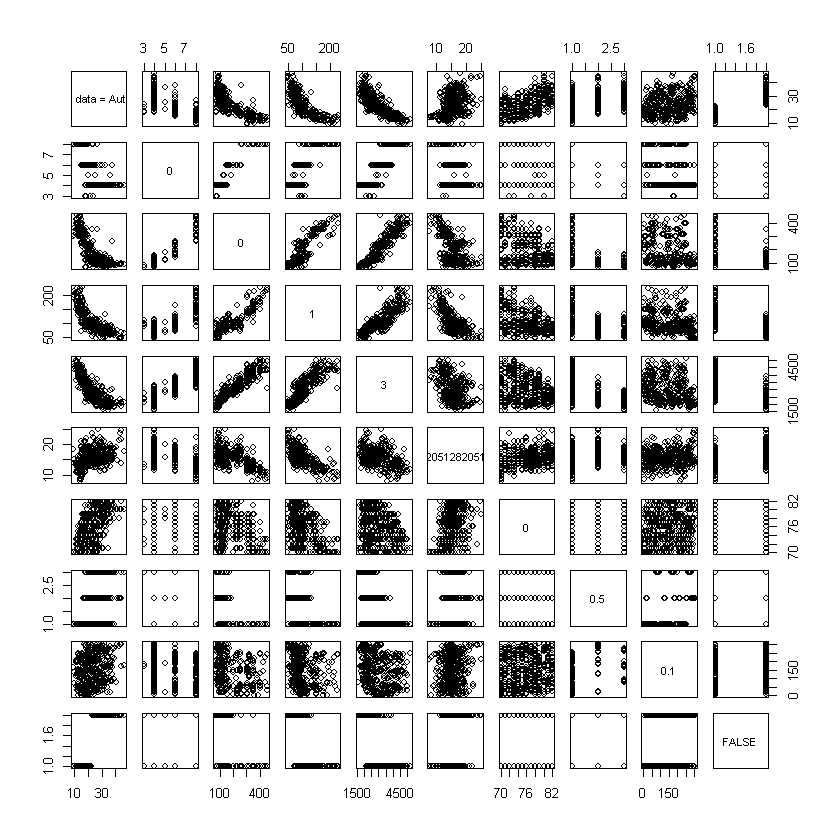

In [25]:
svm_linear = svm(mpg_level ~ ., data = Auto, kernel = 'linear', cost = 1)
plot(Auto, svm_linear)

#### Exercise 8 (p.371)

###### a)

In [26]:
head(OJ)

,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
1,CH,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
2,CH,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
3,CH,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
4,MM,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
5,CH,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0
6,CH,230,7,1.69,1.99,0.00,0.0,0,1,0.965228,1.99,1.69,0.30,Yes,0.000000,0.000000,0.30,0


In [32]:
train = sample(nrow(OJ), 800)
test = -train
OJ.train = OJ[train, ]
OJ.test = OJ[test,]

dim(OJ.train)
dim(OJ.test)
dim(OJ)

[1] 800  18

[1] 270  18

[1] 1070   18

###### b)

In [38]:
set.seed(123)
svm.linear = svm(Purchase ~ ., data = OJ.train, kernel = 'linear', cost = 0.01)
summary(svm.linear)


Call:
svm(formula = Purchase ~ ., data = OJ.train, kernel = "linear", cost = 0.01)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  0.01 

Number of Support Vectors:  442

 ( 222 220 )


Number of Classes:  2 

Levels: 
 CH MM




We have create 442 support vectors, 222 belong to class CH and 220 belong to class MM

###### c)

In [48]:
train_prediction = predict(svm.linear, OJ.train)
table = table(OJ.train$Purchase, train_prediction)
table

    train_prediction
      CH  MM
  CH 430  58
  MM  74 238

In [47]:
(74+58)/(430+74+58+238)

[1] 0.165

In [50]:
test_prediction = predict(svm.linear, OJ.test)
table2 = table(OJ.test$Purchase, test_prediction)
table2

    test_prediction
      CH  MM
  CH 149  16
  MM  29  76

In [51]:
(29+16)/(149+29+16+76)

[1] 0.1666667

We have a test error which is a bit higher than train error 

###### d)

In [60]:
tune.out4 = tune(svm, Purchase ~., data = OJ.train, kernel = "linear", ranges = list(cost = c(0.01,0.05,0.1,0.5,1,2.5,5,7.5,10)))
summary(tune.out4)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost
  2.5

- best performance: 0.1675 

- Detailed performance results:
   cost   error dispersion
1  0.01 0.16750 0.02648375
2  0.05 0.17000 0.03641962
3  0.10 0.16875 0.03076005
4  0.50 0.16875 0.03498512
5  1.00 0.17125 0.03175973
6  2.50 0.16750 0.03872983
7  5.00 0.17250 0.02993047
8  7.50 0.17250 0.02622022
9 10.00 0.17125 0.02889757


Best cost value is 2.5

###### e)

In [66]:
svm.linear = svm(Purchase ~ ., data = OJ.train, kernel = "linear", cost = 2.5)
prediction_train = predict(svm.linear, OJ.train)
prediction_test = predict(svm.linear, OJ.test)

table(OJ.train$Purchase, prediction_train)

    prediction_train
      CH  MM
  CH 426  62
  MM  70 242

In [67]:
(70+62)/(426+70+62+242)

[1] 0.165

In [68]:
table(OJ.test$Purchase, prediction_test)

    prediction_test
      CH  MM
  CH 150  15
  MM  27  78

In [69]:
(27+15)/(27+15+150+78)

[1] 0.1555556

Here we have a lower test error rate than train error rate 

###### f)

In [73]:
svm.radial = svm(Purchase ~., data = OJ.train, kernel = 'radial', ranges = list(cost = c(0.01,0.05,0.1,0.5,1,2.5,5,7.5,10)))
summary(svm.radial)


Call:
svm(formula = Purchase ~ ., data = OJ.train, kernel = "radial", ranges = list(cost = c(0.01, 
    0.05, 0.1, 0.5, 1, 2.5, 5, 7.5, 10)))


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 

Number of Support Vectors:  376

 ( 191 185 )


Number of Classes:  2 

Levels: 
 CH MM


